In [1]:
library(cacoa)
library(Seurat)
library(magrittr)
library(cowplot)
library(ggplot2)
options(repr.plot.width=8, repr.plot.height=10, jupyter.plot_scale = 1,repr.plot.res = 100)
Sys.setenv(https_proxy='http://www-int.dkfz-heidelberg.de:80')
Sys.setenv(http_proxy='http://www-int.dkfz-heidelberg.de:80')

if (exists("snakemake")) {
    cao_input <- snakemake@input[["cacoa_processed"]]
    repermute <- snakemake@params[["permute"]] 
} else {
    base_fp <- "/omics/odcf/analysis/OE0228_projects/VascularAging/rna_sequencing/public_scrnaseq/TabularMuris/"
    cao_input <-  file.path(base_fp, "cao_obj_permute.RDS.gz")
    repermute <- F
}



Attaching SeuratObject



In [ ]:

cao_obj <- readRDS(cao_input)

[1] 1
Filtering data... done!
Calculating pairwise distances using dist='cor'...
Done!
Filtering data... done!
Calculating distances ... done!
[1] 2
Filtering data... done!
Calculating pairwise distances using dist='cor'...
Done!
Filtering data... done!
Calculating distances ... done!


notch went outside hinges. Try setting notch=FALSE.

notch went outside hinges. Try setting notch=FALSE.



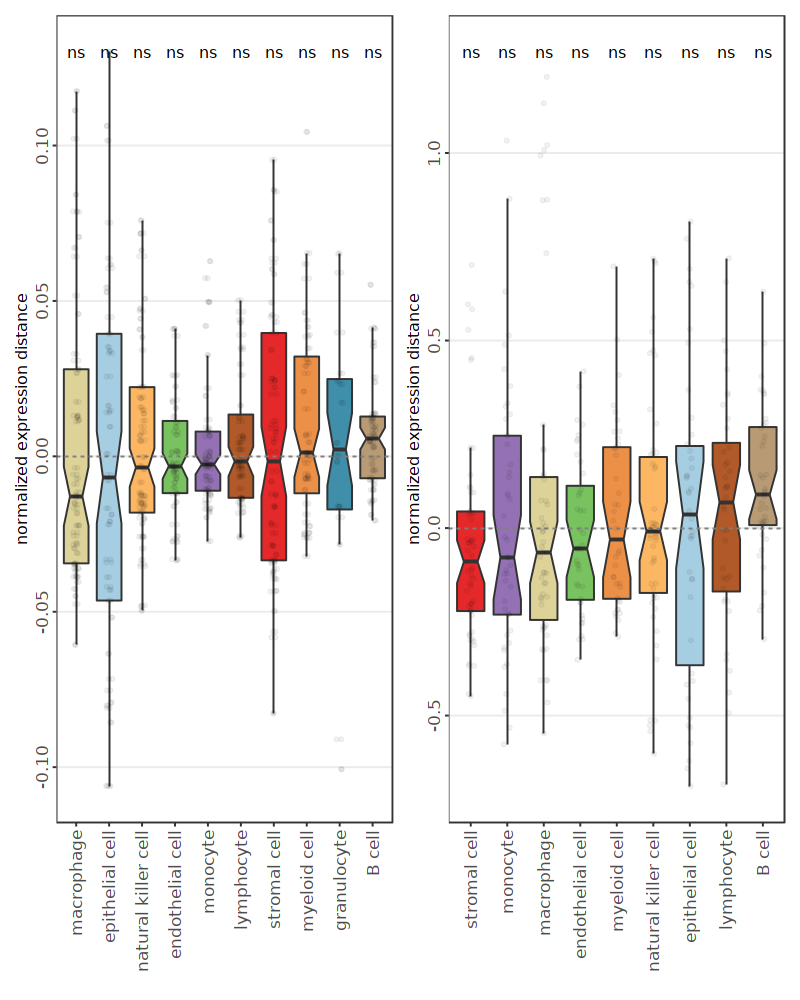

[1] 3
Filtering data... done!
Calculating pairwise distances using dist='cor'...
Done!
Filtering data... done!
Calculating distances ... done!


notch went outside hinges. Try setting notch=FALSE.



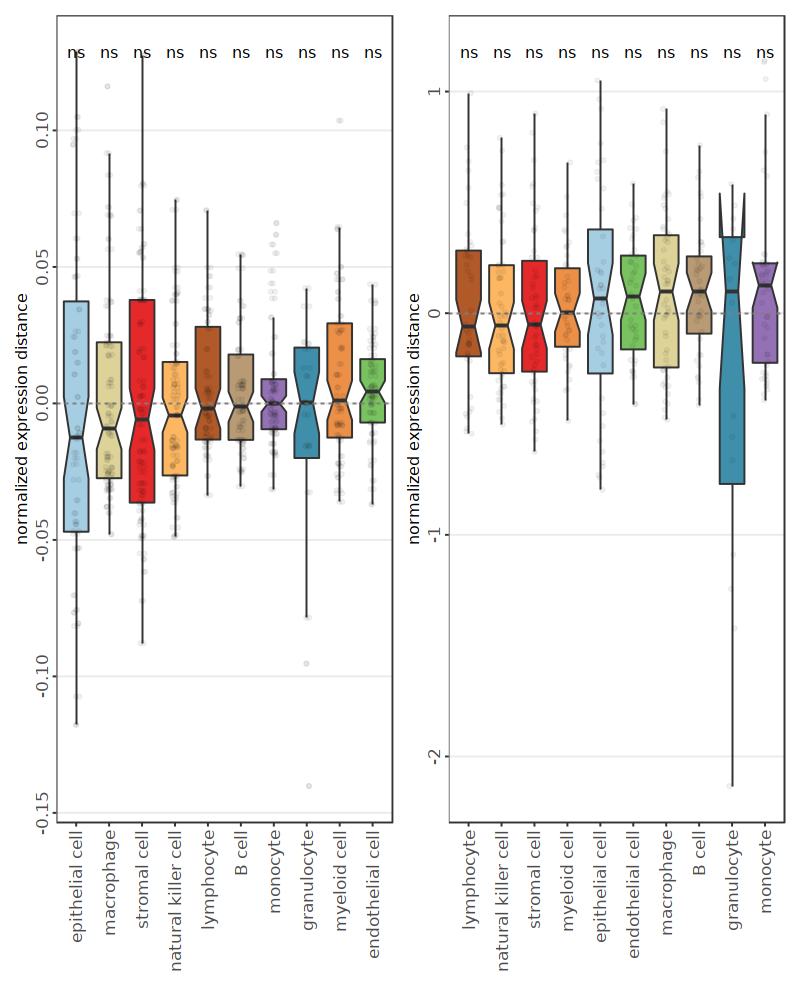

[1] 4
Filtering data... done!
Calculating pairwise distances using dist='cor'...
Done!
Filtering data... done!
Calculating distances ... done!


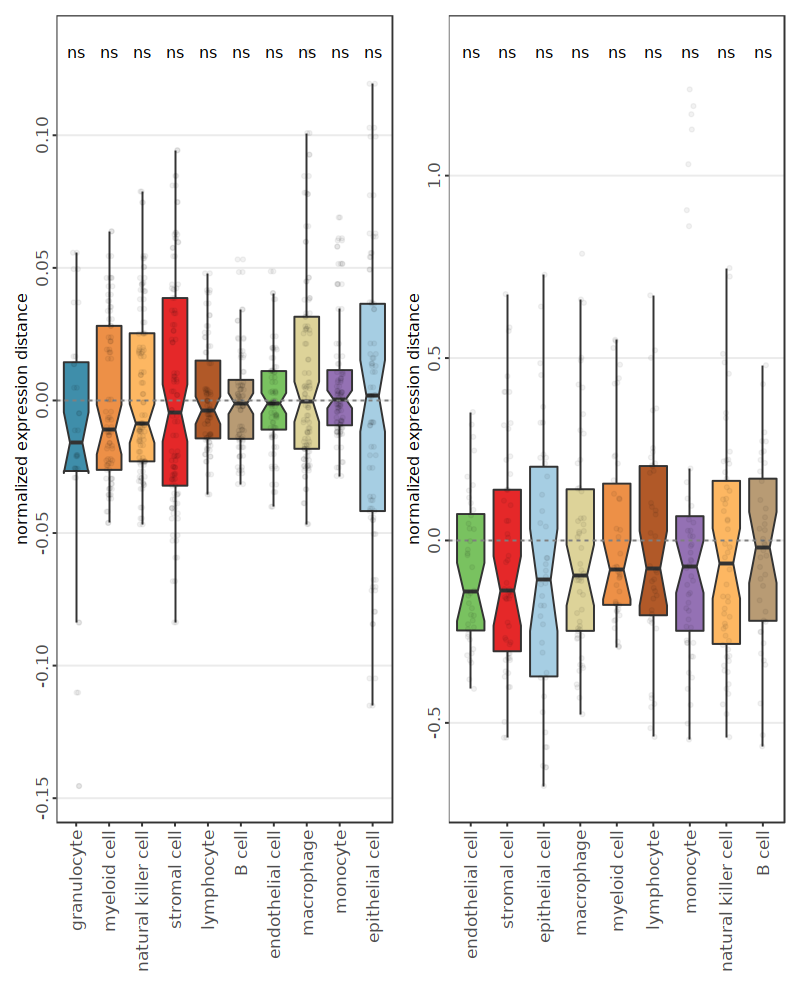

[1] 5
Filtering data... done!
Calculating pairwise distances using dist='cor'...
Done!
Filtering data... done!
Calculating distances ... done!


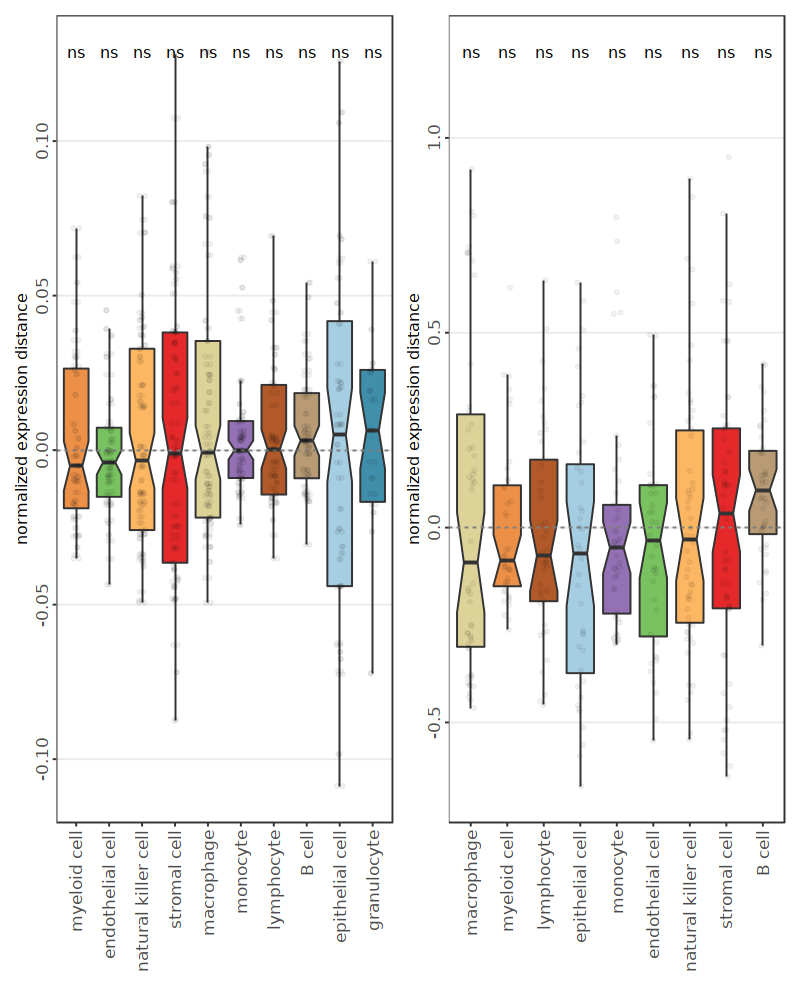

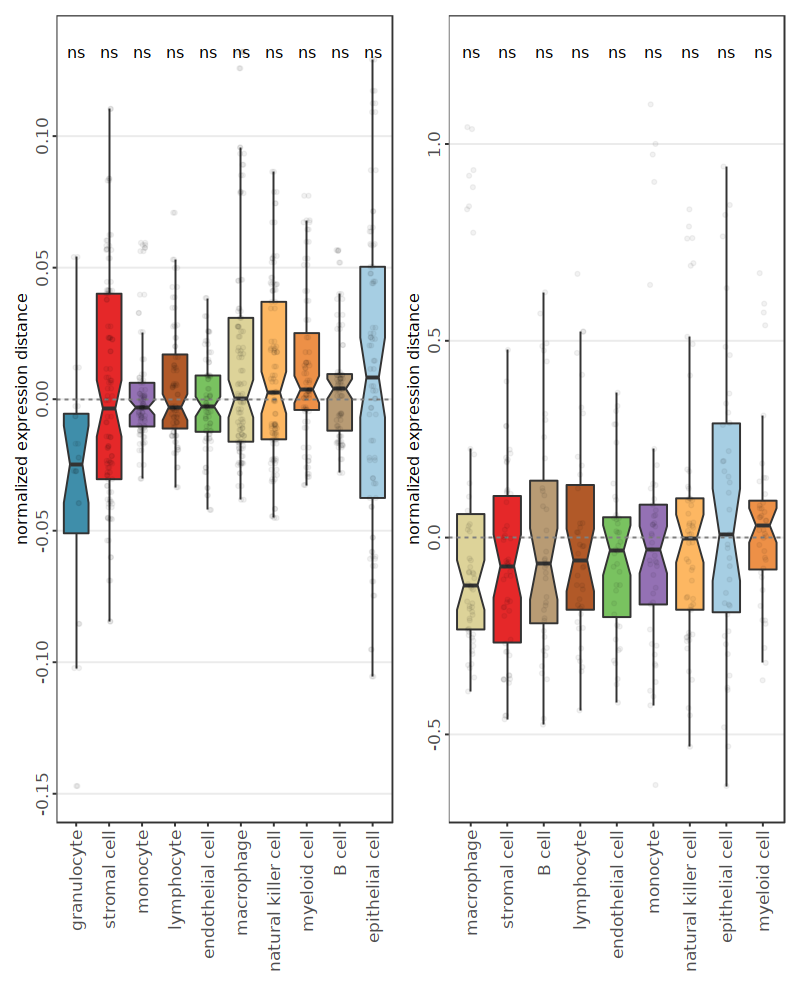

In [16]:
library(patchwork)
if (repermute) {
    for (i in 1:5) {
        print(i)
        names(cao_obj$sample.groups) <- sample(names(cao_obj$sample.groups))
        cao_obj$estimateExpressionShiftMagnitudes(min.cells=10, n.cells=1e3, dist="cor", n.subsamples=50)
        cao_obj$estimateCommonExpressionShiftMagnitudes()

        yeet <- cao_obj$plotExpressionShiftMagnitudes() |
        cao_obj$plotExpressionShiftMagnitudes(shift.type = "common")
        plot(yeet)
    }
}

Filtering data... done!
Calculating pairwise distances using dist='cor'...
Done!
Filtering data... done!
Calculating distances ... done!



Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




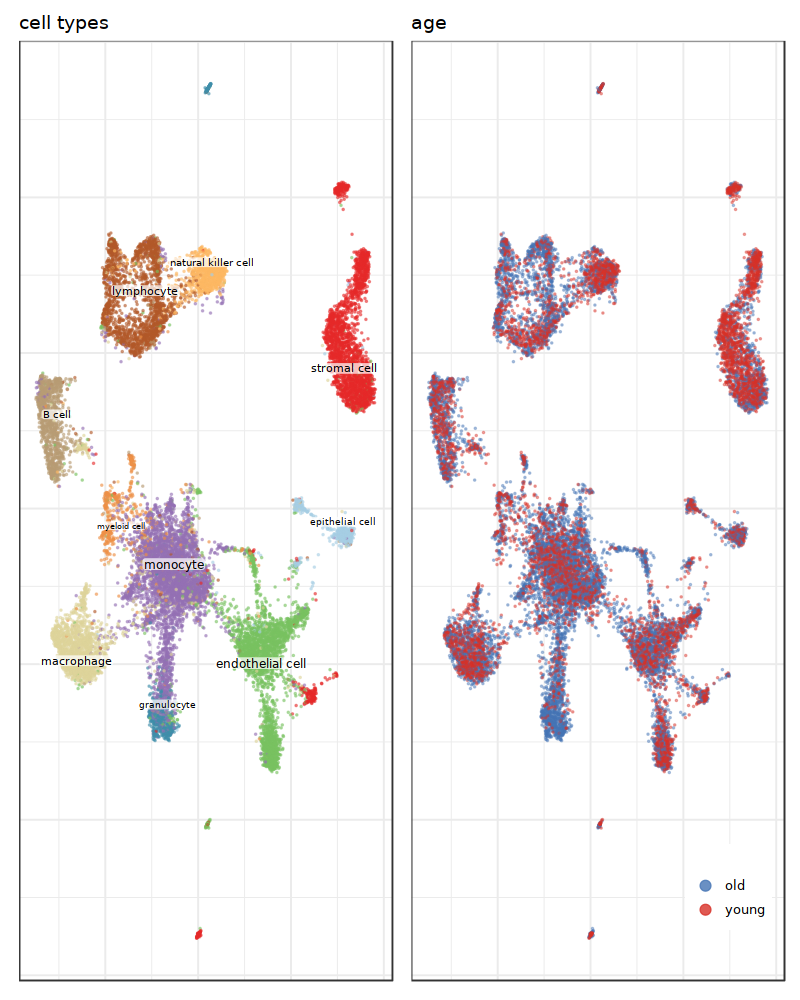

In [4]:
library(ggplot2)
library(patchwork)
size = 0.1
alpha = 0.5
cao_obj$plotEmbedding(color.by='cell.groups', alpha=alpha, size=size, title='cell types', 
                    plot.na=FALSE, show.legend=FALSE, font.size=c(2,3)) |
cao_obj$plotEmbedding(color.by='condition', alpha=0.4, size=0.1, title='age', mark.groups = F) +    theme(legend.position=c(0.85, 0.1)) +
    guides(color=guide_legend(override.aes = list(size=3,alpha=0.8),title='')) 

notch went outside hinges. Try setting notch=FALSE.



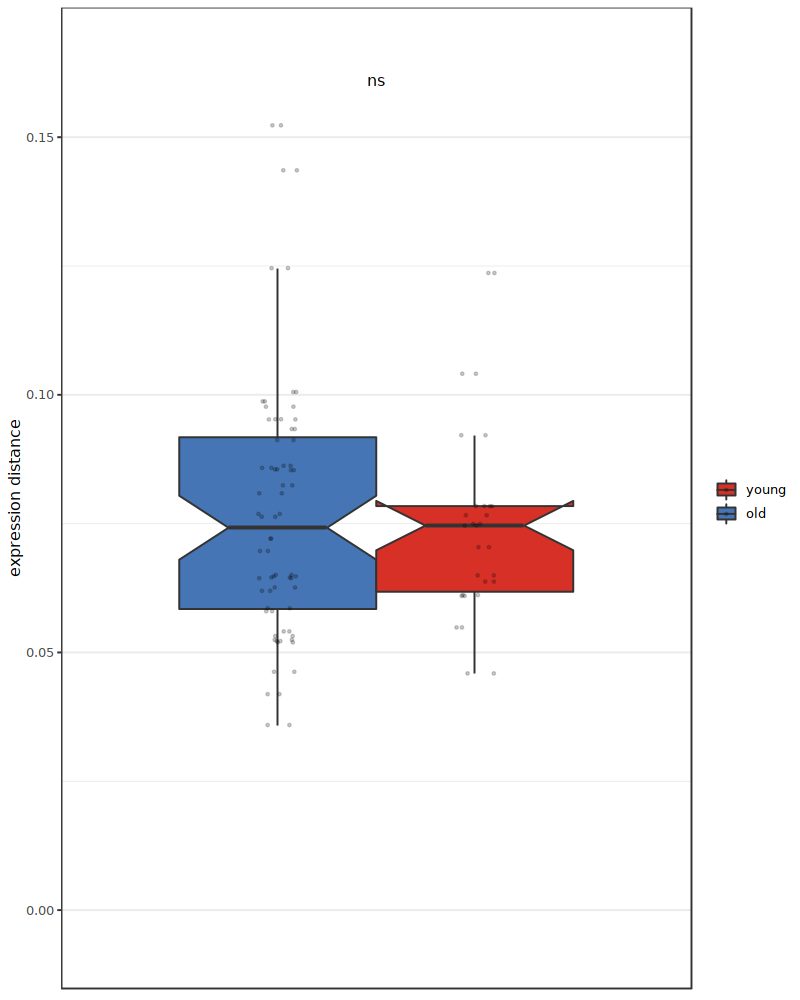

In [5]:
cao_obj$plotExpressionDistance(joint=TRUE, notch=TRUE, show.significance=TRUE)

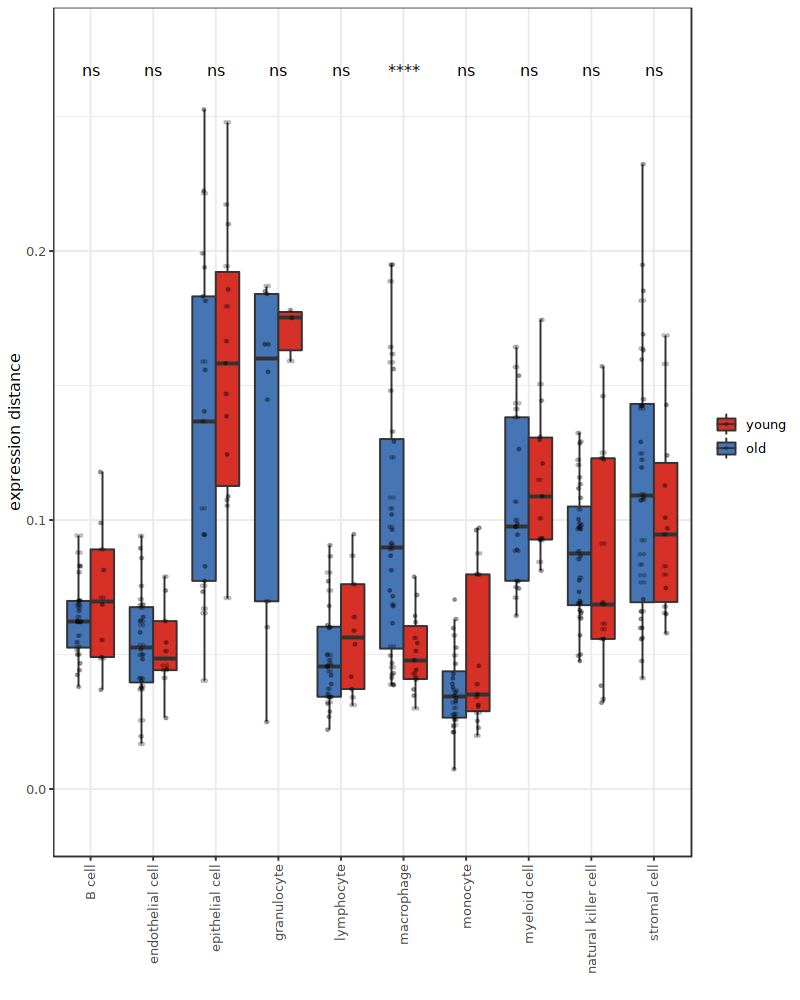

In [6]:
cao_obj$plotExpressionDistance(show.significance=TRUE)

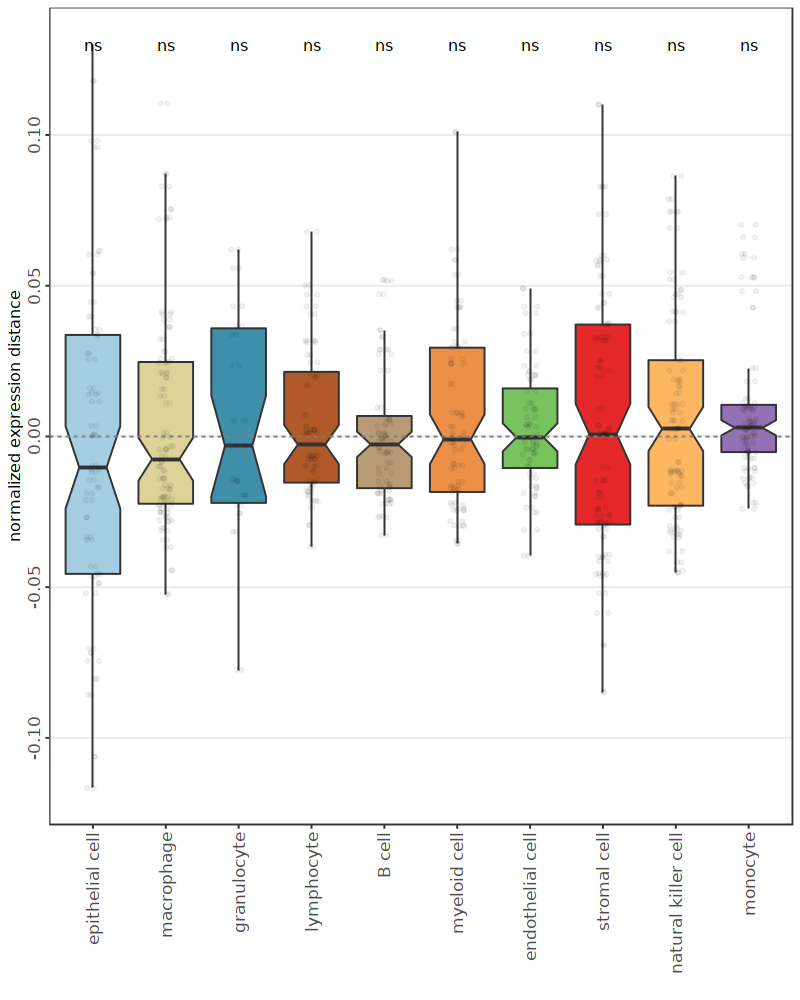

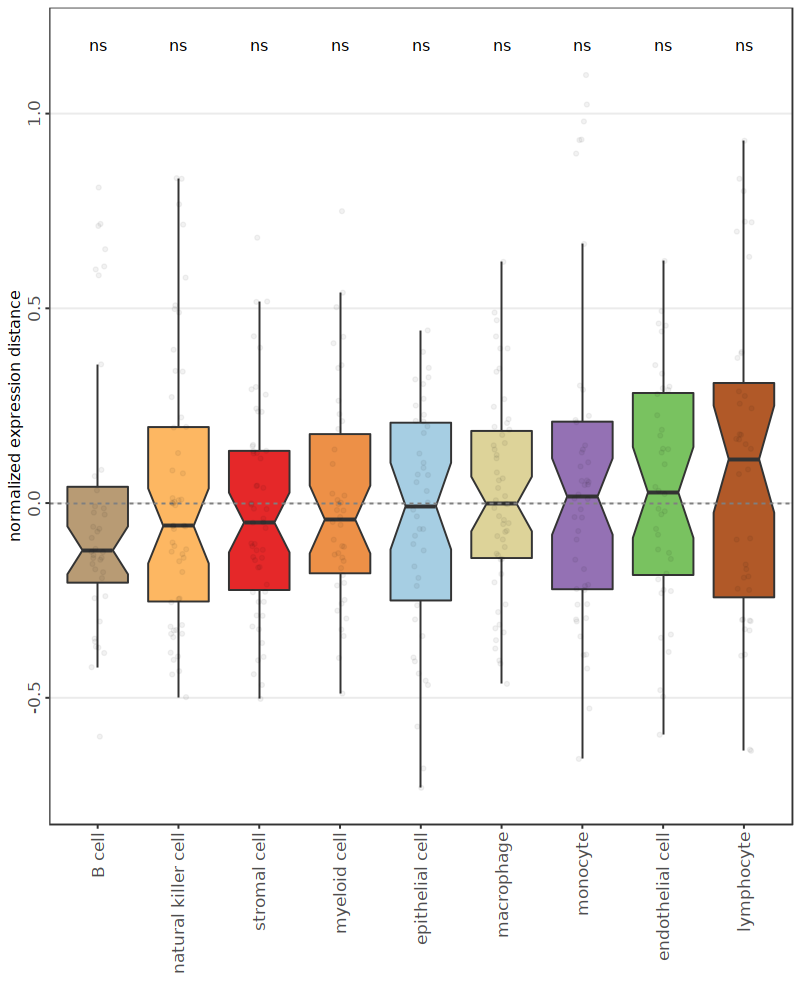

In [11]:
cao_obj$plotExpressionShiftMagnitudes(shift.type = "common")
